# Metropolis-Hastings

https://www.coursera.org/learn/mcmc-bayesian-statistics/lecture/UMw54/algorithm

We want to understand the distribution

$$
P(\theta)
$$

But we are unable to integrat it. 

## Steps

 1. Select initial value of $\theta$, $\theta_0$
 2. For $i \in \{1, \cdots, n\}$  
     a. Draw canidate $\theta^* \sim q(\theta^* | \theta_{i=1})$  
     b. $\alpha = \frac{g(\theta^* / q(\theta^* | \theta_{i=1})}{g(\theta / q(\theta_{i=1} | \theta^* )}$   
     c. $\alpha \ge 1$ accept $\theta^*$ and set $\theta_i \leftarrow \theta^*$  
     d. 0 < $\alpha < 1$ accept $\theta^*$ and set $\theta_i \leftarrow \theta^*$ with probability $\alpha$

## Notes

### Canidate generating distribution $q$

One careful choice we must make is with the candidate generating distribution $q$, It may or may not depend on the previous iteration's value of theta.

### Random walk Metropolis-Hastings

The proposal distribution is centered on the previous iteration. For instance, it might be a normal distribution where the mean is our previous iteration theta i minus 1. Because the normal distribution is symmetric around its mean, this example comes with another really nice advantage. This q evaluated at the candidate given the mean here,


In [1]:
from scipy.stats import norm, t
theta = 5
theta_star = 15

p_theta_given_theta_star = norm(loc=theta_star).pdf(theta)
print("P(θ=|θ')", p_theta_given_theta_star)
      
p_theta_star_given_theta  = norm(loc=theta).pdf(theta_star)

print("P(θ'|θ)", p_theta_star_given_theta)

print(f"for θ'={theta_star} and θ={theta}")

P(θ=|θ') 7.69459862670642e-23
P(θ'|θ) 7.69459862670642e-23
for θ'=15 and θ=5


This doesn't hold if sigmas are different:

In [2]:
theta = 5
sigma = 2
theta_star = 15
sigma_star = 4

p_theta_given_theta_star = norm(loc=theta_star, scale=sigma_star).pdf(theta)
print("P(θ=|θ')", p_theta_given_theta_star)
      
p_theta_star_given_theta  = norm(loc=theta, scale=sigma).pdf(theta_star)

print("P(θ'|θ)", p_theta_star_given_theta)

print(f"for θ'={theta_star} and θ={theta}")

P(θ=|θ') 0.004382075123392135
P(θ'|θ) 7.433597573671489e-07
for θ'=15 and θ=5


### Random walk Metropolis-Hastings pt 1

$$
y_i | \mu \overset{\text{iid}}{\sim} N(\mu, 1), \; i=1, \cdots, n  \\
\mu \sim t(0, 1, 1)
$$

The postier distribution has this form 

$$
p(\mu |y_1, \cdots, y_n) \propto g(\mu|Y) = \frac {\exp[n(\bar{y} \mu - \mu^2/2)]}{1+\mu^2}
$$

with the log

$$
\log(g(\mu)) = n(\bar{y} \mu - \mu^2/2) - \log(1+\mu^2)
$$

In [3]:
import numpy as np
import seaborn as sns

In [4]:
def log_g(mu, n, y_bar):
    return n * (y_bar * mu - mu**2/2) - np.log(1+mu**2)

In [5]:
def mh(n, y_bar, n_iter, mu_init, cand_std):
    mu_out = np.empty(n_iter)
    accept = 0
    mu_now = mu_init
    lg_now = log_g(mu_now, n, y_bar)
    
    for i in range(n_iter):
        mu_cand = mu_now + cand_std * np.random.randn(1)
        lg_cand = log_g(mu_cand, n, y_bar)
        log_alpha = lg_cand - lg_now
        alpha = np.exp(log_alpha)
        u = np.random.uniform()
        if u < alpha:
            mu_now = mu_cand
            lg_now = lg_cand
            accept += 1
        mu_out[i] = mu_now
        
    return mu_out, accept

### Random walk Metropolis-Hastings pt 2



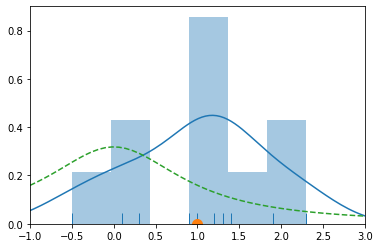

In [6]:
y = np.array([1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9])
sns.distplot(y, bins=6, rug=True)
plt.xlim(-1, 3)
plt.plot(y.mean(), 0, 'o', ms=10)
x = np.linspace(-1, 3)
plt.plot(x, t(df=1, loc=0, scale=1).pdf(x), '--');

In [7]:
np.random.seed(123)
n_iter = 1000
y_bar = y.mean()
n = len(y)
post, accept = mh(n=n, y_bar=y_bar, n_iter=n_iter, mu_init=0, cand_std=3.)

acceptance rate: 0.147


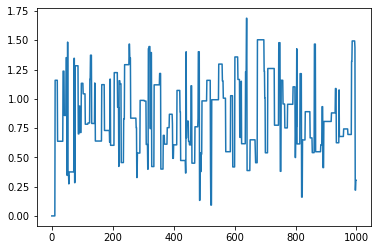

In [8]:
plt.plot(post);
print("acceptance rate:", accept/n_iter)

acceptance rate: 0.966


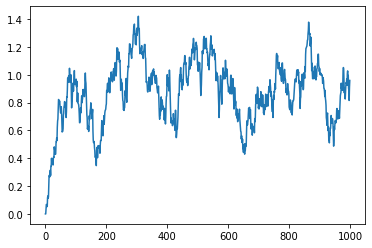

In [9]:
post, accept = mh(n=n, y_bar=y_bar, n_iter=n_iter, mu_init=0, cand_std=.05)
plt.plot(post);
print("acceptance rate:", accept/n_iter)

acceptance rate: 0.379


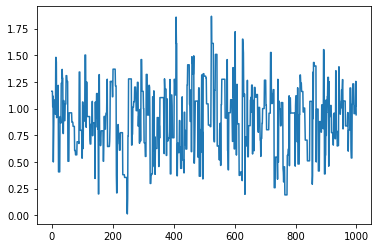

In [10]:
post, accept = mh(n=n, y_bar=y_bar, n_iter=n_iter, mu_init=0, cand_std=.9)
plt.plot(post);
print("acceptance rate:", accept/n_iter)

acceptance rate: 0.409


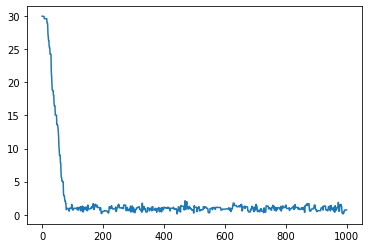

In [11]:
post, accept = mh(n=n, y_bar=y_bar, n_iter=n_iter, mu_init=30, cand_std=.9)
plt.plot(post);
print("acceptance rate:", accept/n_iter)

In [12]:
mu_keep = post[100:]

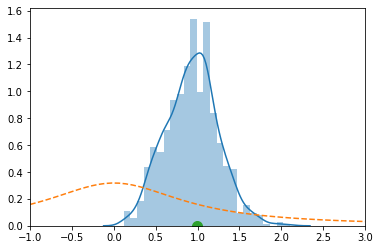

In [13]:
sns.distplot(mu_keep)
plt.xlim(-1, 3)
x = np.linspace(-1, 3)
plt.plot(x, t(df=1, loc=0, scale=1).pdf(x), '--');
plt.plot(y.mean(), 0, 'o', ms=10);